Link to workspace: https://app.datacamp.com/workspace/w/3bd5143d-6dd0-4b8f-8af9-53748608bad9/edit

### Yug Dave, Anushree Patil
#### Fall 2023

## Introduction

Growing up, *Pokémon* was among the favourite animated series of many ‘GenZs’, including ours. The craze for *Pokémon* trading cards was at the peak, which basically had details about different species. With this project, we aimed to recreate those experiences by developing a comprehensive database for *Pokémon* statistics. By amalgamating and organizing diverse datasets encompassing *Pokémon* characteristics, evolutions, debut episodes, and more, our aim is to unlock a treasure trove of insights and applications. The world of *Pokémon* is vast and diverse and we believe that our project is a small step towards the voyage into the heart of *Pokémon* analytics. We've incorporated analysis and visualization to explore potential enhancements for this project.
The main goals of our Data set analysis could be one of the following:
• Pokemon abilities and power analysis: Game developers and players can analyse different
pokemons to find about over powered or under powered Pokemons and develop their
strategies based on that\
• General information about Pokemons: Our analyses can be used for knowing fun facts
about Pokemon.
• Develop classification models: Machine learning and Data Scientist engineers can use our
database for practicing to develop classification models for different pokemons based on
their classification on : Legendary, generation, HP, Attack etc

After scouting the web from the myriad of *Pokémon* datasets available, we gathered three primary datasets from two datasources, which fit perfectly for the scope of this project. The datasets are as followed:

1. Pokemon Dataset: A comprehensive list of around 800 Pokemon from [Kaggle.com](http://Kaggle.com) which was compiled from various sources. It contains Pokemon name, Japanese name and other important statistics - https://www.kaggle.com/datasets/rounakbanik/pokemon, originally scraped from http://serebii.net/

→ **Data Preview** (Only the columns which are used):
![Kaggle_dataset_1](Kaggle_dataset_1.png)

2. Pokemon dataset with Evolution details: A list of around 1500 Pokemon with more statistics and also details on evolution which is one of the most important part of this project. It is also taken from [Kaggle.com](http://Kaggle.com) - https://www.kaggle.com/datasets/mrdew25/pokemon-database 

→ **Data Preview** (Only the columns which are used):

![Kaggle_dataset_2](Kaggle_dataset_2.png)

3. Pokemon debut episodes - A list of debut episodes for Pokemon from the animated series. It was taken from [Bulbapedia.net](http://Bulbapedia.net) and converted to CSV using the online tool - [https://bulbapedia.bulbagarden.net/wiki/List_of_Pokémon_by_anime_debut](https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_anime_debut)

→ **Data Preview:**:

![Bulbapedia_dataset](Bulbapedia_dataset.png)

The datasets we found, were fortunately clean and did not need further modifications. Although, there were some small changes like the first dataset when downloaded had data between three double quotations and had to be changed which we did using .strip() function for string in Python and in the debut episodes dataset, season and episodes had to be separated into two columns which was easily done using RegEx. 


## Database Design

### ER Diagram

**→ Relational Vocabulary:**

- A Single Episode ****************has_many**************** Pokemon
- A Single Pokemon **********************belongs_to********************** a single episode
- A Single Pokemon ******************has_many names******************
- A Single name ************belongs_to a************ a single Pokemon
- A single evolution detail **************************involves_two************************** Pokemon

**→ Conceptual ER:**
A Pokemon has one to one relation with a Pokemon Evolution

![Coneptual_ER_diagram](Coneptual_ER_diagram.png)

**→ Physical ER:**

![Physical_ER](Physical_ER.png)

**→ Table Sketch:**

![table_4](table_4.png)

![table_3](table_3.png)

![table_2](table_2.png)

![table_1](table_1.png)

## Workflow diagram

![Workflow_diagram](Workflow_diagram.png)

## Determining the approach - The Evolutionary challenge

- As seen from the ‘pokemon_evolution.csv’ file, the file references itself to determine what is the name of the pre-evolved Pokemon. This posed a challenge to us as we needed to change both the ‘Name’ and ‘Pre-Evolution Pokemon Id’ columns to match the ‘pokemon_id’s from my ‘pokemons’ table.
- For this task, we decided to follow an approach which involved me using SQL queries on an intermediate ‘evolutions’ table to create a CSV file containing only the pre_evolved_name, post_evolution_name and evolution_detail and then use that CSV file to insert data into the final ‘pokemons_evolutions’ table by looking up the id of Pokemon from the ‘pokemons’ table.

The code for the same is:

![Alternative_approach_1](Alternative_approach_1.png)

![Alternative_approach_2](Alternative_approach_2.png)

This approach gave us the correct output needed and hence works but after discussion with Professor Howison, we decided on an alternative approach

In [1]:
#installing duckdb
!pip install jupysql --quiet
!pip install duckdb-engine --quiet --no-warn-script-location

In [2]:
#setting up duckdb
import duckdb

class ClassDictCursor():
    def __init__(self, duckdb_con):
        self.con = duckdb_con
        self.column_names = [desc[0] for desc in self.con.description]
        
    def __iter__(self):
        return self
        
    def __next__(self):
        if (next_result := self.con.fetchone()):
            return dict(zip(self.column_names, next_result))
        else:
            raise StopIteration
            
%reload_ext sql
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False
%sql duckdb:///duckdb-file.db

In [3]:
%%sql
--creating pokemons table
DROP TABLE IF EXISTS pokemons;
DROP SEQUENCE IF EXISTS seq_pokemon_id;
CREATE SEQUENCE seq_pokemon_id START 1;
CREATE TABLE pokemons (
    id INT PRIMARY KEY DEFAULT NEXTVAL('seq_pokemon_id'),
    name TEXT, 
    type1 TEXT,
    type2 TEXT,
    hp TEXT,
    is_legendary INT,
    episode_id INT
);

--creating an Enum for name_type
DROP TYPE IF EXISTS name_type_enum;
CREATE TYPE name_type_enum AS ENUM ('Japanese_name', 'External Id', 'English Name');

--creating a table for pokemon names
DROP TABLE IF EXISTS pokemon_names;
DROP SEQUENCE IF EXISTS seq_pokemon_names_id;
CREATE SEQUENCE seq_pokemon_names_id START 1;
CREATE TABLE pokemon_names (
    id INT PRIMARY KEY DEFAULT NEXTVAL('seq_pokemon_names_id'),
    pokemon_id INT,
    alternative_name TEXT,
    name_type name_type_enum
);

--creating an Enum for evolution_type
DROP TYPE IF EXISTS evolution_type_enum;
CREATE TYPE evolution_type_enum AS ENUM ('LEVEL', 'OTHER', 'DOES NOT EVOLVE');

--creating a table for pokemon evolutions
DROP TABLE IF EXISTS pokemon_evolutions;
CREATE TABLE pokemon_evolutions (
    pre_evolution_pokemon_id INT,
    post_evolution_pokemon_id INT,
    evolution_type evolution_type_enum
    
);

--creating a table for pokemon episodes
DROP TABLE IF EXISTS pokemon_episodes;
DROP SEQUENCE IF EXISTS seq_pokemon_episodes_id;
CREATE SEQUENCE seq_pokemon_episodes_id START 1;
CREATE TABLE pokemon_episodes (
    id INT PRIMARY KEY DEFAULT NEXTVAL('seq_pokemon_episodes_id'),
    season TEXT,
    episode TEXT
)

,Count


## Loading Data into my Database

- Inserting data using the pokemon_episodes.csv file
- Since all our csv files have different number of Pokemon, we have inserted data into the main pokemons table merging all of the data available and avoiding duplicates
- The idea behind selecting the pokemon_debut.csv file first is that it is the only file which provides a connection between a Pokemon and its' debut episode which would be lost if we only inserted episode details using this file

In [4]:
#insert data into pokemons (name and episode_id), pokemon_names (alternative_name and name_type) and pokemon_episodes (season and episode) using the pokemon_debut.csv file
import csv
import re

with duckdb.connect('duckdb-file.db') as con:
    
    sql_find_episode = """
                        SELECT id
                        FROM pokemon_episodes
                        WHERE season = $new_season AND episode = $new_episode
                        """
    
    sql_insert_episode =  """
                             INSERT INTO pokemon_episodes (season, episode)
                             VALUES ($new_season, $new_episode) RETURNING id
                            """
    sql_insert_pokemon = """
                                INSERT INTO pokemons(name, episode_id)
                                VALUES ($new_name, $new_episode_id) RETURNING id
                                """
    sql_insert_pokemon_name = """
                                 INSERT INTO pokemon_names(pokemon_id, alternative_name, name_type)
                                 VALUES ($new_pokemonId, $new_name, $name_type)
                              """
    with open('pokemon_debut.csv') as csvfile:
        myCSVReader = csv.DictReader(csvfile, delimiter=",", quotechar='"')
        for row in myCSVReader:
            episodeString = row['Episode']
            matches = re.search('S(\d+)(\D+\d+)', episodeString) #using RegEx to split the season and episode
            if matches:
                season = matches.group(1)
                episode = matches.group(2)
                name = row['Name']
                param_dict_episodes = {'new_season': season, 'new_episode': episode}
                con.execute(sql_find_episode, param_dict_episodes)
                id_check = con.fetchone() #checking for duplicate episodes inserted
                if(id_check):
                    episode_id = id_check[0]
                else:
                    con.execute(sql_insert_episode, param_dict_episodes)
                    episode_id = con.fetchone()[0]
                param_dict_pokemon_name = {'new_name':name, 'new_episode_id':episode_id}
                con.execute(sql_insert_pokemon, param_dict_pokemon_name)
                pokemonId = con.fetchone()[0]
                param_dict_name = {'new_pokemonId': pokemonId, 'new_name': name, 'name_type': 'English Name'}
                con.execute(sql_insert_pokemon_name, param_dict_name)

In [5]:
import csv

with duckdb.connect('duckdb-file.db') as con:
    
    #using the update clause to update pokemon data using the pokemon.csv file
    sql_update_pokemon = """
                            UPDATE pokemons
                            SET type1 = $new_type1, 
                                type2 = $new_type2,
                                hp = $new_hp,
                                is_legendary = $new_isLegendary
                                WHERE name = $new_name
                        """
    
    #inserting new rows if pokemon is not existing
    sql_insert_pokemon = """
                            INSERT INTO pokemons (name, type1, type2, hp, is_legendary)
                            VALUES ($new_name, $new_type1, $new_type2, $new_hp, $new_isLegendary)
                            RETURNING id
                        """
    sql_find_pokemon = """
                            SELECT id
                            FROM pokemons
                            WHERE name = $new_name
                        """
    #inserting name for pokemon
    sql_insert_pokemon_name = """
                                 INSERT INTO pokemon_names(pokemon_id, alternative_name, name_type)
                                 VALUES ($new_pokemonId, $new_japaneseName, $new_nameType)
                              """
    
    with open('pokemon.csv') as csvfile:
        myCSVReader = csv.DictReader(csvfile, delimiter=",", quotechar='"')
        for row in myCSVReader:
            name = row['name']
            param_dict_name = {'new_name': name}
            con.execute(sql_find_pokemon, param_dict_name)
            id_check = con.fetchone()
            param_dict_pokemon = {'new_name':name, 'new_type1': row['type1'], 'new_type2': row['type2'], 'new_hp': row['hp'],'new_isLegendary':row['is_legendary']}
            
            if(id_check):
                con.execute(sql_update_pokemon, param_dict_pokemon)
                pokemonId = id_check[0]
            else:
                #inserting pokemon and getting id
                con.execute(sql_insert_pokemon, param_dict_pokemon)
                pokemonId = con.fetchone()[0]
                #inserting the name of the newly added pokemon in the pokemon_names table
                param_dict_pokemon_name = {'new_pokemonId':pokemonId, 'new_japaneseName':name, 'new_nameType': 'English Name'}
                con.execute(sql_insert_pokemon_name, param_dict_pokemon_name)
                #inserting Japanese names for all the pokemons from the pokemon.csv files
            nameType = 'Japanese_name'
            param_dict_names = {'new_pokemonId':pokemonId, 'new_japaneseName':row['japanese_name'], 'new_nameType': nameType}
            con.execute(sql_insert_pokemon_name, param_dict_names)

- Inserting data from ‘pokemon_evolution.csv’ file
- To handle the self referencing in the CSV file, our approach was to include an alternative name which would be the ID of the Pokemon in the CSV file into the ‘pokemon_names’ table which would make it easy to lookup the pokemon_id in the ‘pokemons’ table

In [6]:
import csv
import re

with duckdb.connect('duckdb-file.db') as con:
    
    sql_insert_pokemon_name = """
                                 INSERT INTO pokemon_names(pokemon_id, alternative_name, name_type)
                                 VALUES ($new_pokemon_id, $new_alternativeName, $new_nameType)
                               """
    sql_check_if_entry_exists = """
                                    SELECT *
                                    FROM pokemon_names
                                    WHERE pokemon_id = $pokemon_id AND name_type=$name_type
                                """
    sql_find_id = """
                     SELECT *
                     FROM pokemons
                     WHERE name = $name
                  """
    
    with open('pokemon_evolution_detail.csv') as csvfile:
        myCSVReader = csv.DictReader(csvfile, delimiter=",", quotechar='"')
        for row in myCSVReader:
            name = row['Pokemon Name'].strip('\"') #//"""Bulbasaur""" -> .strip('\"') -> "Bulbasaur" 
            nameType = 'External Id'
            externalId = row['Pokemon Id']
            param = {'name': name}
            con.execute(sql_find_id, param)
            id_check = con.fetchone()
            if (id_check):
                pokemonId = id_check[0]
            check_param_dict = {'pokemon_id': pokemonId, 'name_type':nameType}
            con.execute(sql_check_if_entry_exists, check_param_dict)
            check = con.fetchone()
            if(check):
                continue
            else:
                param_dict_names = {'new_pokemon_id': pokemonId, 'new_alternativeName': row['Pokemon Id'], 'new_nameType':nameType}
                con.execute(sql_insert_pokemon_name, param_dict_names)

In [7]:
import csv
import re

with duckdb.connect('duckdb-file.db') as con:
    
    with open('pokemon_evolution_detail.csv') as csvfile:
        myCSVReader = csv.DictReader(csvfile, delimiter=",", quotechar='"')
        sql_find_post_evol_id = """
                                  SELECT pokemon_id
                                  FROM pokemon_names
                                  WHERE alternative_name = $new_name
                               """
        sql_find_pre_evol_id = """
                                    SELECT pokemon_id
                                    FROM pokemon_names
                                    WHERE alternative_name = $pre_evolution_id
                                """
        sql_insert_evolution = """
                                INSERT INTO pokemon_evolutions(pre_evolution_pokemon_id,                                                                                post_evolution_pokemon_id, evolution_type) 
                                   VALUES ($new_pre_evolution_id, $new_post_evolution_id,                                                                                       $new_evolution_type)
                                """
        
        for row in myCSVReader:
            
            evolutionDetails = row['Evolution Details'].strip('\"')
            if evolutionDetails:
                matches = re.match('Level', evolutionDetails)
                if matches:
                    evolutionType = 'LEVEL'
            else:
                evolutionType = 'OTHER'
                
            if(row['Pre-Evolution Pokemon Id']):
                pre_id = str(int(float(row['Pre-Evolution Pokemon Id'])))
                param_dict_evol_id = {'pre_evolution_id':pre_id}
                con.execute(sql_find_pre_evol_id, param_dict_evol_id)
                id_check = con.fetchone()
                if (id_check):
                    pre_evol_pokemon_id = id_check[0]
                    con.execute(sql_find_pre_evol_id, param_dict_evol_id)
                    param_dict_post_id = {'new_name':row['Pokemon Name'].strip('\"')}
                    con.execute(sql_find_post_evol_id, param_dict_post_id)
                    check = con.fetchone()
                    if check:
                        post_evol_pokemon_id = check[0]
                        param_dict_evolution = {'new_pre_evolution_id': pre_evol_pokemon_id, 'new_post_evolution_id' :                                                      post_evol_pokemon_id, 'new_evolution_type':evolutionType}
                        con.execute(sql_insert_evolution, param_dict_evolution)

## Results
- Veryfying if the data is loaded correctly in the tables
- The main motive of using this query is that it will check if the tables 'pokemons' and 'pokemon_evolutions' are filled correctly and would also help us see if we are able to traverse across the tables like we envisioned

In [8]:
%%sql
SELECT p1.name, p2.name, pe.evolution_type
 FROM pokemon_evolutions AS pe 
 JOIN pokemons AS p1
  ON p1.id = pe.pre_evolution_pokemon_id
  JOIN pokemons AS p2
   ON p2.id = pe.post_evolution_pokemon_id

,name,name_2,evolution_type
0,Bulbasaur,Ivysaur,LEVEL
1,Ivysaur,Venusaur,LEVEL
2,Charmander,Charmeleon,LEVEL
3,Charmeleon,Charizard,LEVEL
4,Squirtle,Wartortle,LEVEL
...,...,...,...
447,Exeggcute,Exeggutor,OTHER
448,Cubone,Marowak,LEVEL
449,Elgyem,Beheeyem,LEVEL
450,Fletchinder,Talonflame,LEVEL


## Visualisation

- We used SQL and Matplotlib to visualise some patterns in the database we created
1. How many Pokemon evolve by ‘Levelling Up’ as opposed to ‘Other’ methods?

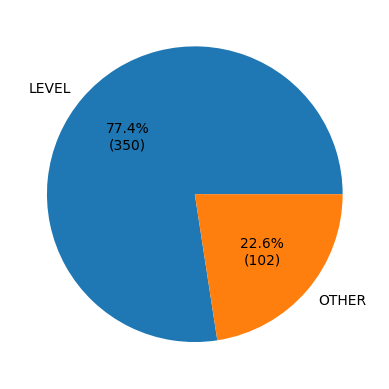

In [9]:

import matplotlib.pyplot as plt

with duckdb.connect('duckdb-file.db') as con:
    sql_count_statement = """
                             SELECT COUNT(*), evolution_type
                            FROM pokemon_evolutions 
                            GROUP BY evolution_type
                            """
    
    con.execute(sql_count_statement)
    results = con.fetchall()
    count = []
    type_evol = []
    #here we convert sql results to arrays using a loop
    for result in results:
        count.append(result[0])
        type_evol.append(result[1])
      
    #function to display the percentage
    def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
    
    plt.pie(count, labels=type_evol, autopct=autopct_format(count))
    plt.show()

2. How many Pokemon are for each ‘type1’?
Each Pokemon has either one or two types based upon the species. These 'types' help us identify the strengths and weaknesses of a Pokemon over another type and would be critical in deciding the overall result of the duel among other factors. For example, A 'Water' type Pokemon will be pitted against a 'Fire' type Pokemon. There are a total of 18 types in the Pokemon universe

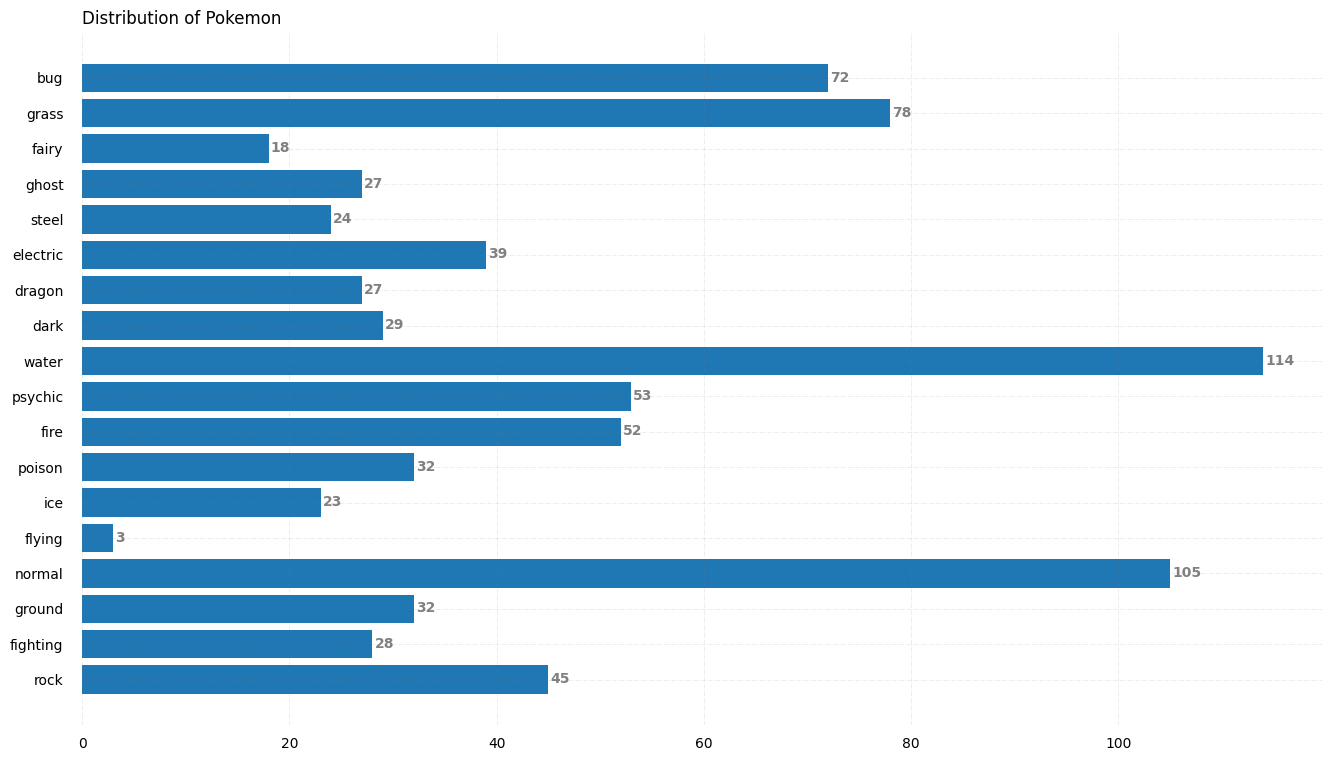

In [10]:
import matplotlib.pyplot as plt

with duckdb.connect('duckdb-file.db') as con:
    sql_count_statement = """
                             SELECT COUNT(*), type1
                                FROM pokemons
                                WHERE type1 IS NOT NULL
                                GROUP BY type1
                            """
    #ignoring the NULL type as the data includes multiple forms of a pokemon where the type data is         unavailable but it would have the same types as it's basic form
    con.execute(sql_count_statement)
    results = con.fetchall()
    count = []
    type_ = []
    #here we convert sql results to arrays using a loop
    for result in results:
        count.append(result[0])
        type_.append(result[1])
        
    fig, ax = plt.subplots(figsize =(16, 9))
    
    # Horizontal Bar Plot
    ax.barh(type_, count)

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    # Add x, y gridlines
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)

    # Show top values 
    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5, 
                 str(round((i.get_width()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='grey')

    # Add Plot Title
    ax.set_title('Distribution of Pokemon',
                 loc ='left', )


    # Show Plot
    plt.show()

## Challenges and Conclusion


Although, we had previous experience in coding, this project was humbling and challenged us at every step we added/removed a complexity, but it was a great learning experience. The biggest challenge we encountered was the complicated CSV file for the evolutions data, which was self referencing to get value of the pre-evolution Pokemon. To solve this, we sat down and used Pandas to implement the approach as Pandas allowed much flexibility. Having received a clear picture, we started to work this out using the approach Professor taught us in the class i.e using only Python, CSV and SQL. After lots of trial and error and using pretty inefficient methods, we were able to come up with a solution which involved creating some intermediary CSV file. Professor Howison also liked this approach, but he wanted to go with an even simpler approach which included using the ‘Table ids’ in the CSV file as ‘Alternative names’ thereby making it easier to reference it to the main table. This approach initially had my head scratching and it took lots of discussion and talks with Professor and many trial and errors to solve. We were quite happy and proud after finally solving it. Some challenges other than that were smaller string conversions and handling NULL values which were easily resolved.

All in all, this was an amazing experience. Although, the Pokemon world is very huge and involves multiple Generations, Series and Games, it felt quite good to do a small analysis and designing a database. We are confident that we would be able to handle even larger datasets from all the basic knowledge which we got from this project.Lastly, we would like to thank Professor James Howison, for his constant support and long discussions and guidance on how do we go about solving the issues. It is still a small step, even though we are happy and proud of our work.

## Tool Learning

Firstly, to get a clear idea of our approach in solving the evolution challenge, we learned pandas to quickly extract data and help us structure our project. After that, to visualise the data which we queried from our database tables, we learned Matplotlib as it offered a quicker solution for visualising results of our magnitude. We used the websites GeeksForGeeks and W3School tio understand the basics of Maplotlib and used it to visualize our data. Quite frankly we were hapy with the results which it delivered. Our next step beyond this project would be to establish this dataset as a base and expand upon it and further query some more interesting insights. We then plan to learn and use 'Tableau' to create a final dashboard for our analysis

## Thank you for reading!